This notebook sets up a data generator and plots generated training examples for visual inspection.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/Shareddrives/AC297r Project - RFCx /rfcx_training_pr_panama_updated')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datagen import DataGenerator, get_files_and_labels

# directory with spectrogram images
train_dir = '../puerto-rico/train/audio/p_spec/'

resize_dim = [224, 224] # desired shape of generated images
augment = 1 # whether to apply data augmentation
batch_size = 32 # samples per batch


In [3]:
spf_path = './class-freqs.npy'

if os.path.exists(spf_path):
    spf = np.load(spf_path)
    spf = {i:[j,k] for (i,j,k) in spf}
else:
    print('Cannot find class-freqs.npy. Please generate the file using get-class-frequencies.ipynb')
    

In [4]:
# get training files and create a label dictionary
files_train, _, labels = get_files_and_labels(train_dir,
                                              train_split=1.0)

# create a data generator instance
train_generator = DataGenerator(files_train,
                                labels,
                                resize_dim=resize_dim,
                                batch_size=batch_size,
                                augment=augment)


In [5]:
# load an example batch
example = train_generator.__getitem__(0)


In [10]:
y = example[1]
X = example[0]

In [13]:
X.shape

(32, 224, 224, 3)

In [16]:
a# load nbatch batches into memory
nbatch = 10
X = np.zeros((np.min([len(train_generator)*batch_size, nbatch*batch_size]), example[0].shape[1], example[0].shape[2], example[0].shape[3]))
y = np.zeros((np.min([len(train_generator)*batch_size, nbatch*batch_size]), len(os.listdir(train_dir))))
c = 0
for ii in range(np.min([len(train_generator), nbatch])):
    if ii % 100 ==0:
        print(ii)
    item = train_generator.__getitem__(ii)
    for j in range(item[0].shape[0]):
        X[c,:,:,:]=item[0][j]
        y[c,:]=item[1][j]
        c+=1


In [11]:
# get the index of present species in each sample

# for masked loss target vector:
# yp = [np.where(~np.isnan(i))[0] for i in y]

# for binary crossentropy target vector
yp = [np.argmax(i) for i in y]


idx = 0
Amazona_vittata
Number samples: 32


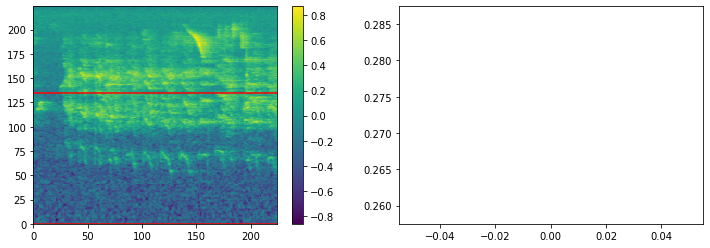

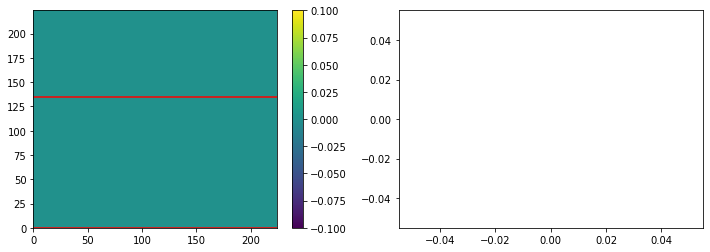

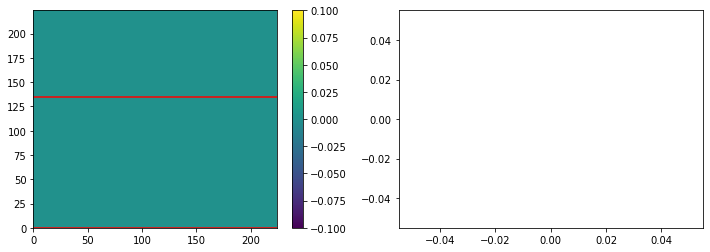

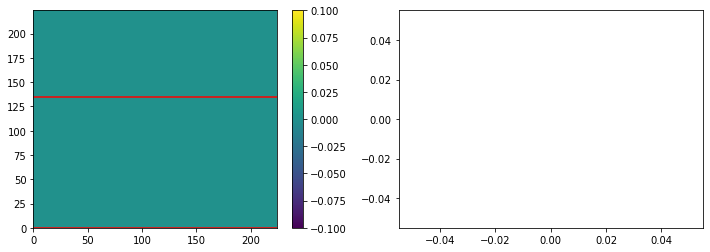

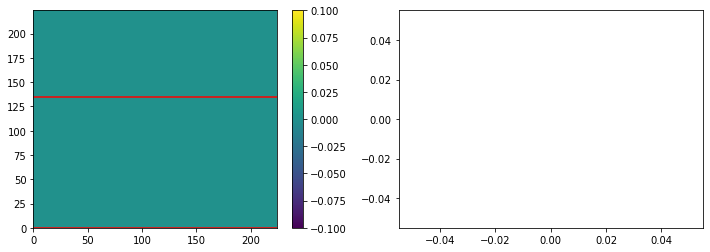

In [12]:
# pick a random class index
idx = np.random.choice(yp, 1)[0]
print('idx = '+str(idx))

# max number of plots to produce
N = 5

labels_rev = {v:k for (k,v) in labels.items()} # for getting class from index
tmp = X[np.where(yp==idx)[0],:,:]
tmpy = y[np.where(yp==idx)[0],:]
print(labels_rev[idx])
print('Number samples: '+str(tmp.shape[0]))

for ii in np.random.choice(len(tmp),min(N,len(tmp)),replace=False):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sample = tmp[ii].mean(axis=-1).squeeze()
    plt.pcolormesh(sample)
    # highlight the class' frequency range with red lines
    plt.gca().axhline(int(spf[labels_rev[idx]][0]),c='r')
    plt.gca().axhline(int(spf[labels_rev[idx]][1])+1,c='r')
    plt.colorbar()
    plt.subplot(1,2,2)
    # plot the target vector
    plt.plot(tmpy[ii])
    
    